# Распространение тепла

### Условие задачи

**Дано:**
- пластина, в которой распространяется тепло от нескольких источников
  
- коэффициенты диффузии:
    -  основного материала (синий цвет) $D_0 = 1.0$
    -  включений (белый цвет) $D_1 = 10^{-2}$

- размер массива поля температур $NxN$, где $N \in [60, 120, 240, 480, 960]$

- $T_0 = 0$ - начальная температура во всем объеме пластины

- граничные условия на ребрах пластины двух видов:
    - фиксированная температура на ребрах
        - $x = 0$
        - $y = 0$
    - абсолютная теплоизоляция на ребрах
        - $x = 60$
        - $y = 60$

- в массе пластины расположены источники тепла, мощность которых меняется по периодическому закону:
    -  $\dot{q}_i = p_i \cdot (sin(\frac{2\pi}{\theta_i}t) + 1)$
    - источник 0: $p_0 = 100$, $\theta_0 = 43$
    - источник 1: $p_1 = 100$, $\theta_1 = 77$
    
- на пластине расположены 4 пробы (черные точки)
    
- $t_m = 600$ c - общее время моделирования

**Пример схемы пластины для варианта 0**

<img src="var_00.png" width=600/>


**Требуется:**
- согласно уравнению диффузии смоделировать распространение тепла в пластине на заданное время $t_m$ для каждого $N$
- шаг по времени $dt$ подобрать самостоятельно так, чтобы расчетная схема сходилась
- для каждого $N$:
    1. вывести время расчета
    
    2. сохранить в файл(ы) и использовать в пунктах 3-5:
        - температурное поле в конечный момент времени
        - замеры температуры в местах установки проб
        - **сохраненные файлы НЕ загружать в классрум**
    
    3. построить изображение матрицы коэффициентов диффузии

    4. построить цветовую карту поля температур в конечный момент времени
        - подписать оси,
        - отобразить цветовую шкалу `colorbar`,
        - отобразить пробы в виде точек и подписать их номера.

    5. на одном рисунке построить графики температур в местах установки всех четырех проб
        - подписать оси,
        - вывести легенду.

    6. используя быстрое преобразование Фурье, восстановить периоды колебаний температуры в местах установки проб
        - `np.fft.rfft`, `np.fft.rfftfreq`, `scipy.signal.find_peaks`

    7. задокументировать все функции


**Материалы:**

- [Уравнение теплопроводности](https://ru.wikipedia.org/wiki/Уравнение_теплопроводности)
- [Solving 2D heat equation numerically using python](https://levelup.gitconnected.com/solving-2d-heat-equation-numerically-using-python-3334004aa01a)
- [Diffusion Eq 2D with Source](https://www.youtube.com/watch?v=aCRYfvh_bnY)


**Правила оценивания:**

- оценка за корректно выполненный расчет для $N$, баллов из 100:
```
    N    =   60,  120, 240, 480, 960
    g(N) =    5,    5,  10,  30,  50
```
    
- штрафы $p(i)$, баллов:
    - не выведено время расчета - 20
    - не выполнено сохранение результатов в файл(ы) - 20
    - построение графиков не использует сохраненные результаты - 20
    - не построены графики температур в местах установки проб - 20
    - не построена карта поля температур - 20
    - не построена карта коэффициентов диффузии - 10
    - не посчитаны периоды колебаний - 20
    - отсутствует документация функций - 20
    - менее значимые недоработки - 10


- итоговая оценка за задание = $\sum_{k=1}^{4}{g(N_k)} - \sum_{i}{p(i)}$


2D heat equation solver


<IPython.core.display.Javascript object>


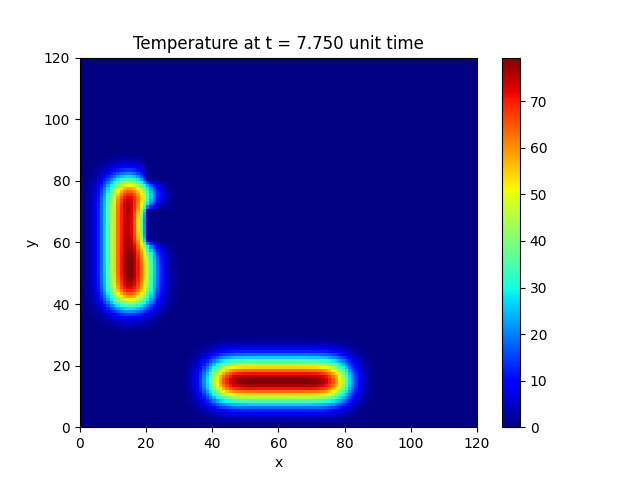

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

print("2D heat equation solver")

plate_length = 60

alpha = 2
delta_x = 1

# Calculate the time step based on the stability condition
delta_t = (delta_x ** 2) / (4 * alpha)

# Коэффициент диффузии для основного материала (синий цвет)
D0 = 1.0

# Коэффициент диффузии для участка с квадратом
D1 = 1e-2

# Пересчитываем коэффициент gamma с учетом D0
gamma = (D0 * delta_t) / (delta_x ** 2)

# Calculate the total simulation time
t_m = 600  # Total simulation time in seconds
max_iter_time = int(t_m / delta_t)

# Initialize solution: the grid of u(k, i, j)
u = np.empty((max_iter_time, plate_length, plate_length))

# Initial condition everywhere inside the grid
u_initial = 0

# Set the initial condition
u.fill(u_initial)

# Parameters for the periodic heat sources
p0, theta0 = 100, 43
p1, theta1 = 100, 77

def heat_source_power(t, p, theta):
    return p * (np.sin(2 * (np.pi / theta) * t) + 1)

def initialize_heat_sources(u, t):
    # Добавляем источники тепла как черные точки
    black_points = [(20, 20), (20, 40), (40, 40), (40, 20)]
    for point in black_points:
        # Не устанавливаем температурное значение для черных точек
        pass
    # Add the first heat source as a rectangle with corner coordinates
    bottom_left_1 = (5, 20)
    top_right_1 = (10, 40)

    u[t, bottom_left_1[0]:top_right_1[0], bottom_left_1[1]:top_right_1[1]] = heat_source_power(t * delta_t, p0, theta0)

    # Add the second heat source as a rectangle with corner coordinates
    bottom_left_2 = (20, 5)
    top_right_2 = (40, 10)

    u[t, bottom_left_2[0]:top_right_2[0], bottom_left_2[1]:top_right_2[1]] = heat_source_power(t * delta_t, p1, theta1)

initialize_heat_sources(u, 0)

def calculate(u):

    for k in range(0, max_iter_time-1, 1):
        initialize_heat_sources(u, k+1)
        for i in range(1, plate_length-1):
            for j in range(1, plate_length-1):
                # Учитываем участок с измененным коэффициентом диффузии
                if (30 <= i <= 35 and 10 <= j <= 30) or (35 <= i <= 50 and 25 <= j <= 30) or (45 <= i <= 50 and 10 <= j <= 25) or (40 <= i <= 45 and 10 <= j <= 15):
                    u[k + 1, i, j] = gamma * (D1 * (u[k][i+1][j] + u[k][i-1][j] + u[k][i][j+1] + u[k][i][j-1] - 4*u[k][i][j])) + u[k][i][j]
                else:
                    u[k + 1, i, j] = gamma * (D0 * (u[k][i+1][j] + u[k][i-1][j] + u[k][i][j+1] + u[k][i][j-1] - 4*u[k][i][j])) + u[k][i][j]

        # Применяем граничные условия
        # Фиксированная температура на ребрах (x=0, y=0)
        u[k + 1, :, 0] = u_initial  # Левая граница
        u[k + 1, 0, :] = u_initial  # Нижняя граница

        # Абсолютная теплоизоляция на ребрах (x=60, y=60)
        u[k + 1, :, -1] = u[k, :, -2]  # Правая граница
        u[k + 1, -1, :] = u[k, -2, :]  # Верхняя граница

    return u

def plotheatmap(u_k, k):
    plt.clf()

    plt.title(f"Temperature at t = {k*delta_t:.3f} unit time")
    plt.xlabel("x")
    plt.ylabel("y")

    # Визуализация тепловой карты
    plt.pcolormesh(u_k, cmap='jet', vmin=np.min(u_k), vmax=np.max(u_k))
    plt.colorbar()

    # Добавление черных точек
    black_points = [(20, 20), (20, 40), (40, 40), (40, 20)]
    for point in black_points:
        plt.scatter(point[1], point[0], c='black', marker='o', s=30)  # Инвертированные координаты для отображения на тепловой карте

    return plt

%matplotlib notebook

# Do the calculation here
u = calculate(u)

def animate(k):
    plotheatmap(u[k], k)

fig = plt.figure()
anim = animation.FuncAnimation(fig, animate, frames=max_iter_time, repeat=False)
plt.show()


2D heat equation solver


<IPython.core.display.Javascript object>


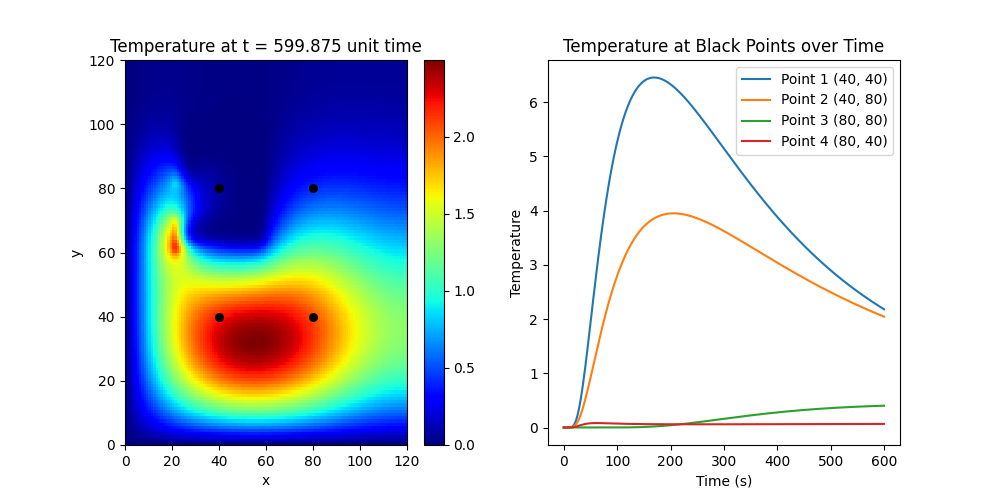

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import pickle

print("2D heat equation solver")

# Размер сетки NxN (выберите один из вариантов: 60, 120, 240, 480, 960)
N = 120

plate_length = N

alpha = 2
delta_x = 1

# Рассчитываем временной шаг на основе условия устойчивости
delta_t = (delta_x ** 2) / (4 * alpha)

# Коэффициент диффузии для основного материала (синий цвет)
D0 = 1.0

# Коэффициент диффузии для участка с квадратом
D1 = 1e-2

# Пересчитываем коэффициент gamma с учетом D0
gamma = (D0 * delta_t) / (delta_x ** 2)

# Рассчитываем общее время моделирования
t_m = 600  # Общее время моделирования в секундах
max_iter_time = int(t_m / delta_t)

# Инициализируем решение: сетка u(k, i, j)
u = np.empty((max_iter_time, plate_length, plate_length))

# Начальное условие везде внутри сетки
u_initial = 0

# Устанавливаем начальное условие
u.fill(u_initial)

# Параметры для периодических источников тепла
p0, theta0 = 100, 43
p1, theta1 = 100, 77

def heat_source_power(t, p, theta):
    return p * (np.sin(2 * (np.pi / theta) * t) + 1)

def initialize_heat_sources(u, t):
    # Добавляем первый источник тепла как прямоугольник
    bottom_left_1 = (int(N * 5 / 60), int(N * 20 / 60))
    top_right_1 = (int(N * 10 / 60), int(N * 40 / 60))
    u[t, bottom_left_1[0]:top_right_1[0], bottom_left_1[1]:top_right_1[1]] = heat_source_power(t * delta_t, p0, theta0)
    # Добавляем второй источник тепла как прямоугольник
    bottom_left_2 = (int(N * 20 / 60), int(N * 5 / 60))
    top_right_2 = (int(N * 40 / 60), int(N * 10 / 60))
    u[t, bottom_left_2[0]:top_right_2[0], bottom_left_2[1]:top_right_2[1]] = heat_source_power(t * delta_t, p1, theta1)

initialize_heat_sources(u, 0)

black_points = [(int(N * 20 / 60), int(N * 20 / 60)), (int(N * 20 / 60), int(N * 40 / 60)),
                    (int(N * 40 / 60), int(N * 40 / 60)), (int(N * 40 / 60), int(N * 20 / 60))]

black_points_temperatures = np.empty((max_iter_time, len(black_points)))

def calculate(u, black_points_temperatures):
    for k in range(0, max_iter_time-1, 1):
        initialize_heat_sources(u, k+1)
        for i in range(1, plate_length-1):
            for j in range(1, plate_length-1):
                if (int(N * 30 / 60) <= i <= int(N * 35 / 60) and int(N * 10 / 60) <= j <= int(N * 30 / 60)) or \
                   (int(N * 35 / 60) <= i <= int(N * 50 / 60) and int(N * 25 / 60) <= j <= int(N * 30 / 60)) or \
                   (int(N * 45 / 60) <= i <= int(N * 50 / 60) and int(N * 10 / 60) <= j <= int(N * 25 / 60)) or \
                   (int(N * 40 / 60) <= i <= int(N * 45 / 60) and int(N * 10 / 60) <= j <= int(N * 15 / 60)):
                    u[k + 1, i, j] = gamma * (D1 * (u[k][i+1][j] + u[k][i-1][j] + u[k][i][j+1] + u[k][i][j-1] - 4*u[k][i][j])) + u[k][i][j]
                else:
                    u[k + 1, i, j] = gamma * (D0 * (u[k][i+1][j] + u[k][i-1][j] + u[k][i][j+1] + u[k][i][j-1] - 4*u[k][i][j])) + u[k][i][j]
        
        
        # Сохраняем температуры в черных точках
        for idx, point in enumerate(black_points):
            black_points_temperatures[k + 1, idx] = u[k + 1, point[0], point[1]]

        u[k + 1, :, 0] = u_initial
        u[k + 1, 0, :] = u_initial
        u[k + 1, :, -1] = u[k, :, -2]
        u[k + 1, -1, :] = u[k, -2, :]
    return u, black_points_temperatures

def plotheatmap(u_k, k):
    plt.clf()
    plt.title(f"Temperature at t = {k * delta_t:.3f} unit time")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.pcolormesh(u_k, cmap='jet', vmin=0, vmax=u_k.max())
    plt.colorbar()
    
    return plt

# Выполнение вычислений
u, black_points_temperatures = calculate(u, np.zeros((max_iter_time, len(black_points))))

# Сохранение данных в файлы .py с использованием модуля pickle
with open('u_data.py', 'wb') as u_file:
    pickle.dump(u, u_file)

with open('black_points_temperatures_data.py', 'wb') as black_points_file:
    pickle.dump(black_points_temperatures, black_points_file)

# Создание нового изображения с явным указанием размеров
plt.figure(figsize=(10, 5))
final_time_index = max_iter_time - 1
# Визуализация тепловой карты
plt.subplot(121)
plt.title(f"Temperature at t = {final_time_index * delta_t:.3f} unit time")
plt.xlabel("x")
plt.ylabel("y")
plt.pcolormesh(u[final_time_index], cmap='jet', vmin=np.min(u[final_time_index]), vmax=np.max(u[final_time_index]))
plt.colorbar()

# Помещаем черные точки на тепловую карту и добавляем их в легенду
for idx, point in enumerate(black_points):
    plt.scatter(point[1], point[0], color='black', marker='o', s=30, label=f'Point {idx+1}')

# Построение графика изменения температуры в черных точках
plt.subplot(122)
for idx, point in enumerate(black_points):
    plt.plot(np.arange(max_iter_time) * delta_t, black_points_temperatures[:, idx], label=f'Point {idx+1} ({point[0]}, {point[1]})')

plt.title("Temperature at Black Points over Time")
plt.xlabel("Time (s)")
plt.ylabel("Temperature")
plt.legend()

plt.show()

In [ ]:
import pickle

# Загрузка данных из файлов .py
with open('u_data.py', 'rb') as u_file:
    u = pickle.load(u_file)

with open('black_points_temperatures_data.py', 'rb') as black_points_file:
    black_points_temperatures = pickle.load(black_points_file)

    # Вывод содержимого в консоль
print("Variable 'u':")
print(u)

print("\nVariable 'black_points_temperatures':")
print(black_points_temperatures)


к сожалению не успел доделать(((
к четвергу планирую прекрепить доделанную работу, думаю, что даже с понижающим коэффициентом оценка может стать лучше, чем за это..